In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [71]:
file_path = 'Documents/amazon_orders.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')
df.head()


/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_7785/3060056535.py:2: DtypeWarning: Columns (16,18,19,22,36,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


,amazon_order_id,merchant_order_id,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,url,ship_service_level,...,is_exchange_order,original_order_id,account_id,create_time,update_time,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,171-0003648-9448303,NaN,16/12/23 6:56,23/12/23 9:46,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,0,NaN,3,18/01/24 3:04,18/01/24 3:04,NaN,NaN,NaN,NaN,NaN
1,171-0007507-1641150,NaN,07/11/22 12:21,14/11/22 8:23,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,0,NaN,4,18/01/24 3:10,18/01/24 3:10,NaN,NaN,NaN,NaN,NaN
2,171-0009886-8466729,NaN,20/11/22 15:35,26/11/22 5:08,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,0,NaN,4,18/01/24 3:10,18/01/24 3:10,NaN,NaN,NaN,NaN,NaN
3,171-0012199-2736313,171-0012199-2736313,29/03/24 12:10,30/03/24 4:42,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,...,0,NaN,3,13/04/24 10:08,13/04/24 10:08,NaN,NaN,NaN,NaN,NaN
4,171-0014290-9993133,NaN,17/03/23 14:30,17/03/23 19:29,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NaN,NextDay,...,0,NaN,5,18/01/24 4:17,18/01/24 4:17,NaN,NaN,NaN,NaN,NaN


In [72]:
df.shape

(46315, 46)

In [73]:
df.isna().sum()

amazon_order_id                0
merchant_order_id          21293
purchase_date                  0
last_updated_date              0
order_status                   0
fulfillment_channel            0
sales_channel                  0
order_channel              25022
url                        46315
ship_service_level             0
product_name                   0
sku                            0
asin                          23
item_status                 3443
quantity                      41
currency                    6059
item_price                    55
item_tax                      57
shipping_price                47
shipping_tax                  13
gift_wrap_price               13
gift_wrap_tax                 31
item_promotion_discount       47
ship_promotion_discount       23
ship_city                    148
SHIP_STATE                   166
ship_state                   166
ship_postal_code             173
ship_country                 191
promotion_ids              23499
is_busines

In [74]:
columns_to_drop = [
    'merchant_order_id',
    'amazon_order_id',
    'order_channel',
    'url',
    'promotion_ids',
    'purchase_order_number',
    'price_designation',
    'fulfilled_by',
    'original_order_id',
    'Unnamed: 41',
    'Unnamed: 42',
    'Unnamed: 43',
    'Unnamed: 44',
    'Unnamed: 45'
]
df.drop(columns=columns_to_drop, inplace=True)

In [75]:
columns_to_check_null = [
    'asin',
    'item_status',
    'quantity',
    'currency',
    'item_price',
    'item_tax',
    'shipping_price',
    'shipping_tax',
    'gift_wrap_price',
    'gift_wrap_tax',
    'item_promotion_discount',
    'ship_promotion_discount',
    'ship_city',
    'ship_state',
    'ship_postal_code',
    'ship_country',
    'is_business_order',
    'is_iba',
    'is_replacement_order',
    'is_exchange_order',
    'account_id',
    'create_time',
    'update_time'
]
df.dropna(subset=columns_to_check_null, inplace=True)
df.isna().sum()

purchase_date              0
last_updated_date          0
order_status               0
fulfillment_channel        0
sales_channel              0
ship_service_level         0
product_name               0
sku                        0
asin                       0
item_status                0
quantity                   0
currency                   0
item_price                 0
item_tax                   0
shipping_price             0
shipping_tax               0
gift_wrap_price            0
gift_wrap_tax              0
item_promotion_discount    0
ship_promotion_discount    0
ship_city                  0
SHIP_STATE                 0
ship_state                 0
ship_postal_code           0
ship_country               0
is_business_order          0
is_iba                     0
is_replacement_order       0
is_exchange_order          0
account_id                 0
create_time                0
update_time                0
dtype: int64

In [76]:
df.shape

(38589, 32)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38589 entries, 0 to 45422
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   purchase_date            38589 non-null  object 
 1   last_updated_date        38589 non-null  object 
 2   order_status             38589 non-null  object 
 3   fulfillment_channel      38589 non-null  object 
 4   sales_channel            38589 non-null  object 
 5   ship_service_level       38589 non-null  object 
 6   product_name             38589 non-null  object 
 7   sku                      38589 non-null  object 
 8   asin                     38589 non-null  object 
 9   item_status              38589 non-null  object 
 10  quantity                 38589 non-null  object 
 11  currency                 38589 non-null  object 
 12  item_price               38589 non-null  object 
 13  item_tax                 38589 non-null  object 
 14  shipping_price           38

In [78]:
datetime_columns = [
    'purchase_date', 'last_updated_date', 'create_time',
    'update_time']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_7785/2527759847.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_7785/2527759847.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn/T/ipykernel_7785/2527759847.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/mj/r3dfln1d2zjb146r3_q0z8yc0000gn

In [79]:
numerical_columns = ['quantity', 'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
                     'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount', 'ship_promotion_discount']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

df['is_iba'] = df['is_iba'].astype('float64')
df['account_id'] = df['account_id'].astype('float64')

In [80]:
df.describe()

,purchase_date,last_updated_date,quantity,item_price,item_tax,shipping_price,shipping_tax,gift_wrap_price,gift_wrap_tax,item_promotion_discount,ship_promotion_discount,is_iba,account_id,create_time,update_time
count,38589,38589,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.0,38589.000000,38589.000000,38589.0,38589.000000,38589,38589
mean,2023-05-08 21:04:30.218456064,2023-05-12 14:42:54.077587200,1.047319,1355.562299,73.773143,16.129856,0.209632,0.051310,0.0,3.531763,12.860150,0.0,4.115758,2024-02-16 09:20:28.486356224,2024-02-16 09:20:28.486356224
min,2021-01-09 03:45:00,2021-01-10 03:07:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,2024-01-02 06:00:00,2024-01-02 06:00:00
25%,2022-08-16 10:05:00,2022-08-19 11:50:00,1.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,2024-01-18 03:18:00,2024-01-18 03:18:00
50%,2023-05-14 12:31:00,2023-05-21 07:28:00,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.000000,2024-01-18 03:31:00,2024-01-18 03:31:00
75%,2024-02-05 18:48:00,2024-02-14 13:40:00,1.000000,2499.000000,68.640000,40.000000,0.000000,0.000000,0.0,0.000000,40.000000,0.0,4.000000,2024-01-29 07:59:00,2024-01-29 07:59:00
max,2024-12-06 23:15:00,2024-12-06 21:17:00,30.000000,29990.000000,2287.350000,1500.000000,15.250000,30.000000,0.0,8097.300000,1000.000000,0.0,18.000000,2024-12-06 07:37:00,2024-12-06 07:37:00
std,NaN,NaN,0.485447,1134.857345,137.529769,25.975636,1.405040,1.239639,0.0,55.135323,22.629945,0.0,2.028216,NaN,NaN


In [81]:
df=df.drop(columns=['is_iba', 'gift_wrap_tax'])
df.describe()

,purchase_date,last_updated_date,quantity,item_price,item_tax,shipping_price,shipping_tax,gift_wrap_price,item_promotion_discount,ship_promotion_discount,account_id,create_time,update_time
count,38589,38589,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589.000000,38589,38589
mean,2023-05-08 21:04:30.218456064,2023-05-12 14:42:54.077587200,1.047319,1355.562299,73.773143,16.129856,0.209632,0.051310,3.531763,12.860150,4.115758,2024-02-16 09:20:28.486356224,2024-02-16 09:20:28.486356224
min,2021-01-09 03:45:00,2021-01-10 03:07:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2024-01-02 06:00:00,2024-01-02 06:00:00
25%,2022-08-16 10:05:00,2022-08-19 11:50:00,1.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2024-01-18 03:18:00,2024-01-18 03:18:00
50%,2023-05-14 12:31:00,2023-05-21 07:28:00,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2024-01-18 03:31:00,2024-01-18 03:31:00
75%,2024-02-05 18:48:00,2024-02-14 13:40:00,1.000000,2499.000000,68.640000,40.000000,0.000000,0.000000,0.000000,40.000000,4.000000,2024-01-29 07:59:00,2024-01-29 07:59:00
max,2024-12-06 23:15:00,2024-12-06 21:17:00,30.000000,29990.000000,2287.350000,1500.000000,15.250000,30.000000,8097.300000,1000.000000,18.000000,2024-12-06 07:37:00,2024-12-06 07:37:00
std,NaN,NaN,0.485447,1134.857345,137.529769,25.975636,1.405040,1.239639,55.135323,22.629945,2.028216,NaN,NaN


In [82]:
df.nunique()

purchase_date              37072
last_updated_date          27256
order_status                  12
fulfillment_channel            2
sales_channel                  1
ship_service_level             5
product_name                1622
sku                         1442
asin                        1199
item_status                    2
quantity                      16
currency                       1
item_price                   700
item_tax                     731
shipping_price                31
shipping_tax                  24
gift_wrap_price                2
item_promotion_discount      288
ship_promotion_discount       17
ship_city                   6181
SHIP_STATE                    99
ship_state                   172
ship_postal_code            7905
ship_country                   1
is_business_order              3
is_replacement_order           2
is_exchange_order              3
account_id                     5
create_time                  365
update_time                  365
dtype: int

In [83]:
df=df.drop(columns=['sales_channel', 'currency','ship_country'])

In [84]:
df.columns

Index(['purchase_date', 'last_updated_date', 'order_status',
       'fulfillment_channel', 'ship_service_level', 'product_name', 'sku',
       'asin', 'item_status', 'quantity', 'item_price', 'item_tax',
       'shipping_price', 'shipping_tax', 'gift_wrap_price',
       'item_promotion_discount', 'ship_promotion_discount', 'ship_city',
       'SHIP_STATE', 'ship_state', 'ship_postal_code', 'is_business_order',
       'is_replacement_order', 'is_exchange_order', 'account_id',
       'create_time', 'update_time'],
      dtype='object')

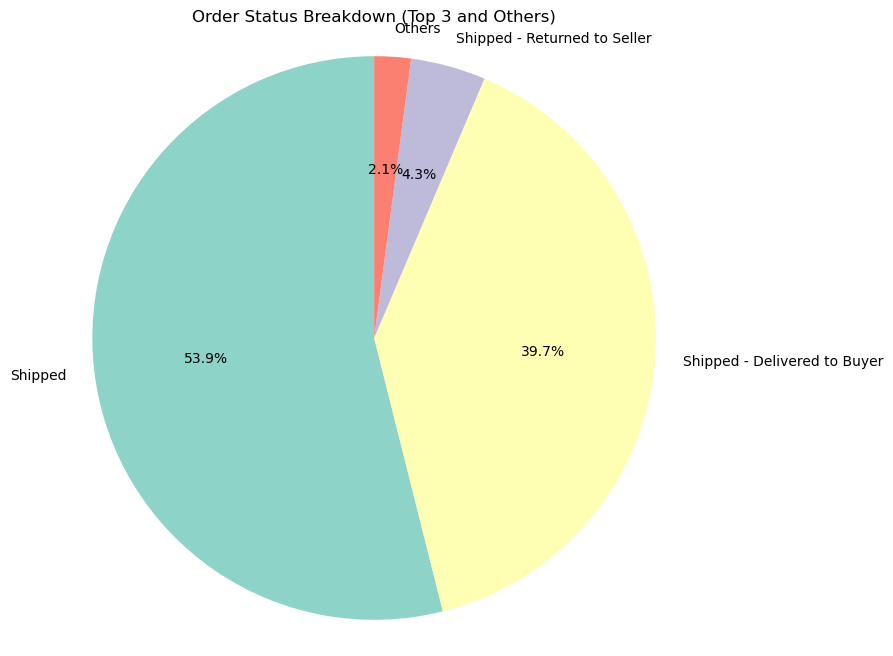

In [85]:
order_status_counts = df['order_status'].value_counts()
top_3_status = order_status_counts.nlargest(3)
other_status = pd.Series({'Others': order_status_counts[3:].sum()})  # Sum of remaining statuses
pie_data = pd.concat([top_3_status, other_status])
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Order Status Breakdown (Top 3 and Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


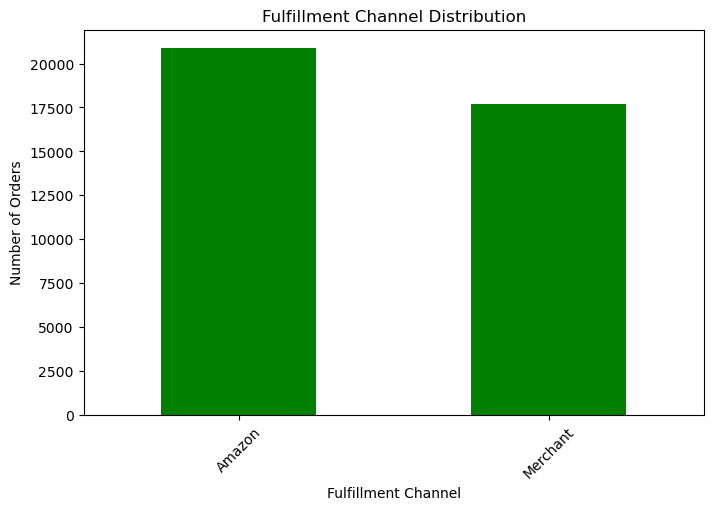

In [86]:
fulfillment_channel_counts = df['fulfillment_channel'].value_counts()
plt.figure(figsize=(8, 5))
fulfillment_channel_counts.plot(kind='bar', color='green')
plt.title('Fulfillment Channel Distribution')
plt.xlabel('Fulfillment Channel')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

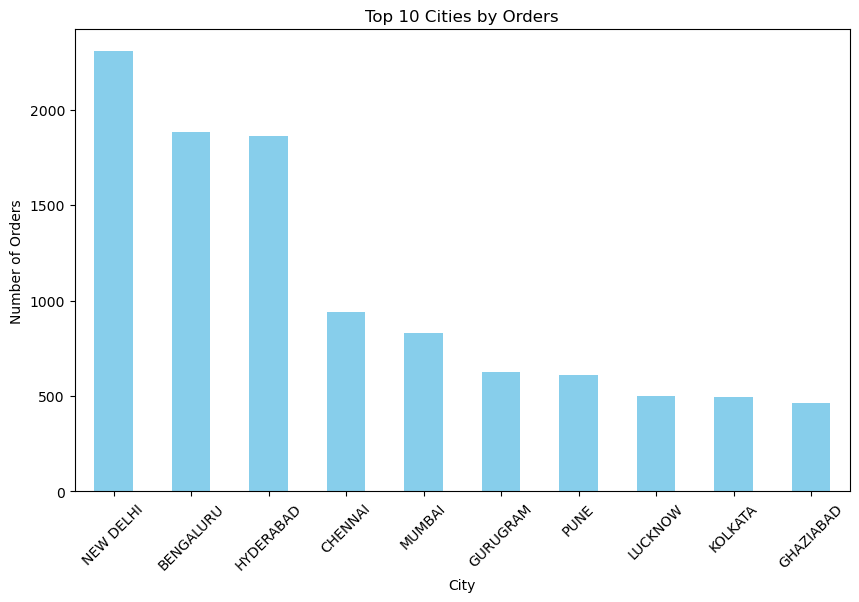

In [87]:
ship_city_counts = df['ship_city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ship_city_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


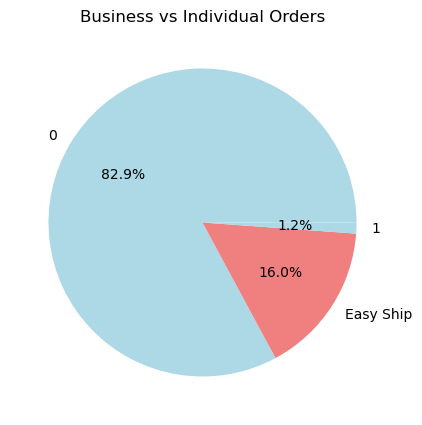

In [88]:
business_orders = df['is_business_order'].value_counts()
plt.figure(figsize=(8, 5))
business_orders.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Business vs Individual Orders')
plt.ylabel('')
plt.show()


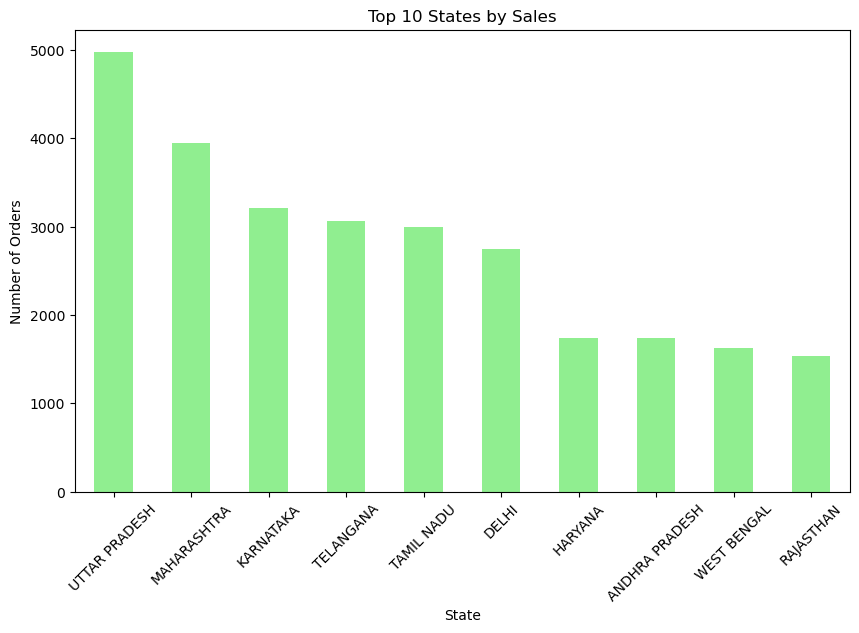

In [89]:
top_states = df['ship_state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='lightgreen')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


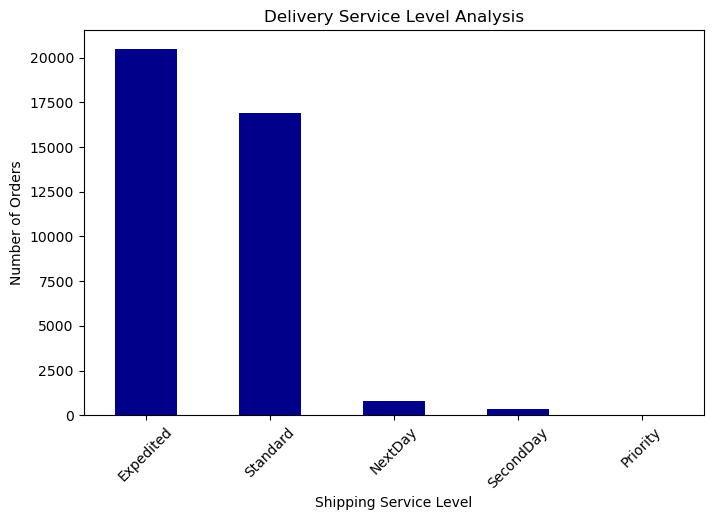

In [90]:
shipping_service_counts = df['ship_service_level'].value_counts()
plt.figure(figsize=(8, 5))
shipping_service_counts.plot(kind='bar', color='darkblue')
plt.title('Delivery Service Level Analysis')
plt.xlabel('Shipping Service Level')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

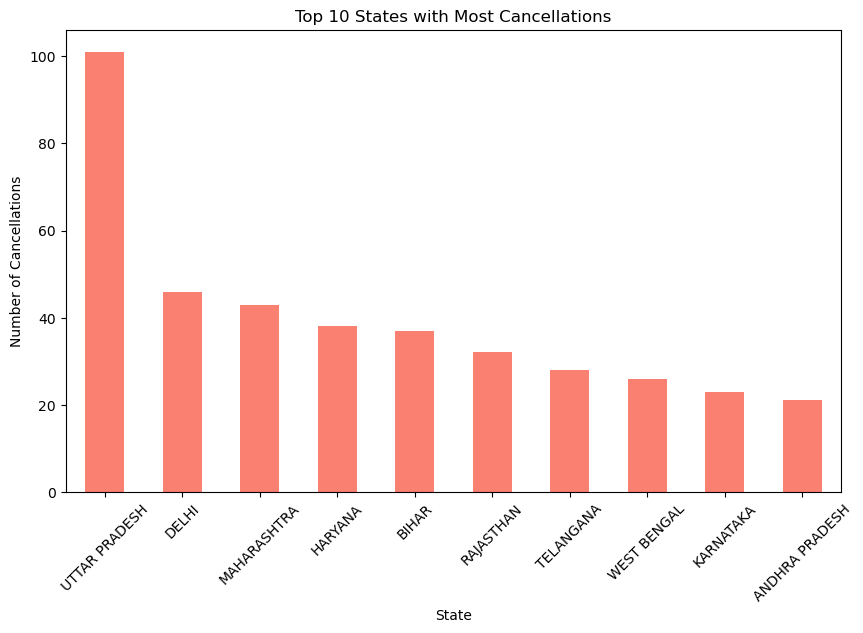

In [91]:
cancellation_state = df[df['order_status'] == 'Cancelled'].groupby('ship_state')['order_status'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
cancellation_state.plot(kind='bar', color='salmon')
plt.title('Top 10 States with Most Cancellations')
plt.xlabel('State')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

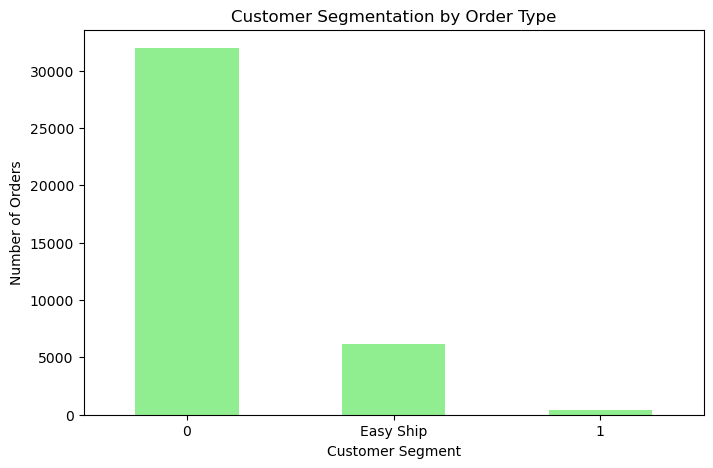

In [92]:
# Customer Segmentation Analysis (Bar Chart)
customer_segment_counts = df['is_business_order'].value_counts()

plt.figure(figsize=(8, 5))
customer_segment_counts.plot(kind='bar', color='lightgreen')
plt.title('Customer Segmentation by Order Type')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


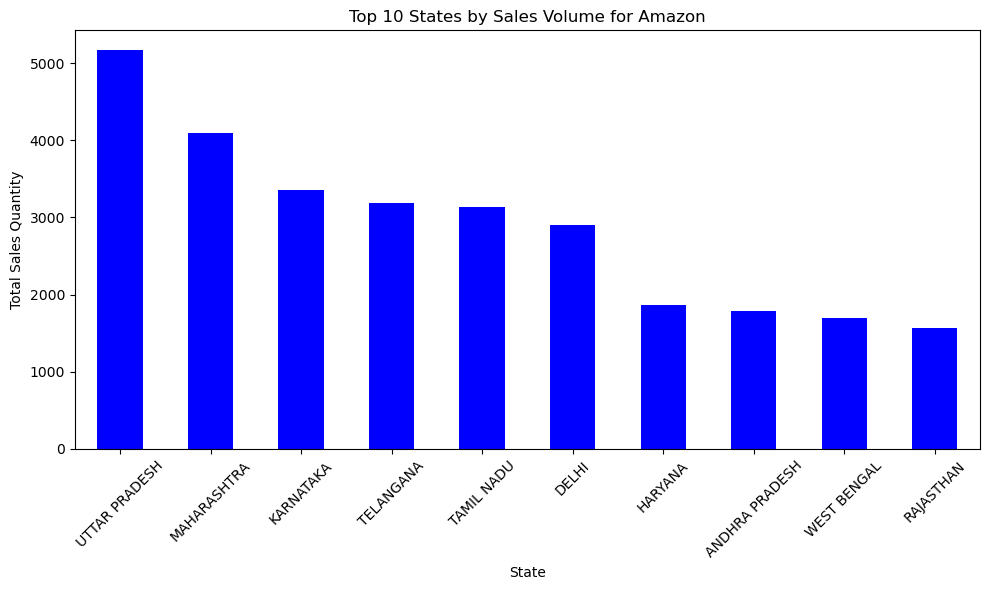

In [93]:
# Group by state (assuming 'ship_state' is the correct column) and sum the 'quantity' for total sales volume
state_volume = df.groupby('ship_state')['quantity'].sum().nlargest(10)  # Top 10 states by volume

# Plot State vs Volume
plt.figure(figsize=(10, 6))
state_volume.plot(kind='bar', color='blue')
plt.title('Top 10 States by Sales Volume for Amazon')
plt.xlabel('State')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
# Replace 'NEW DELHI' with 'DELHI' in the 'ship_state' column
df['ship_state'] = df['ship_state'].replace('NEW DELHI', 'DELHI')


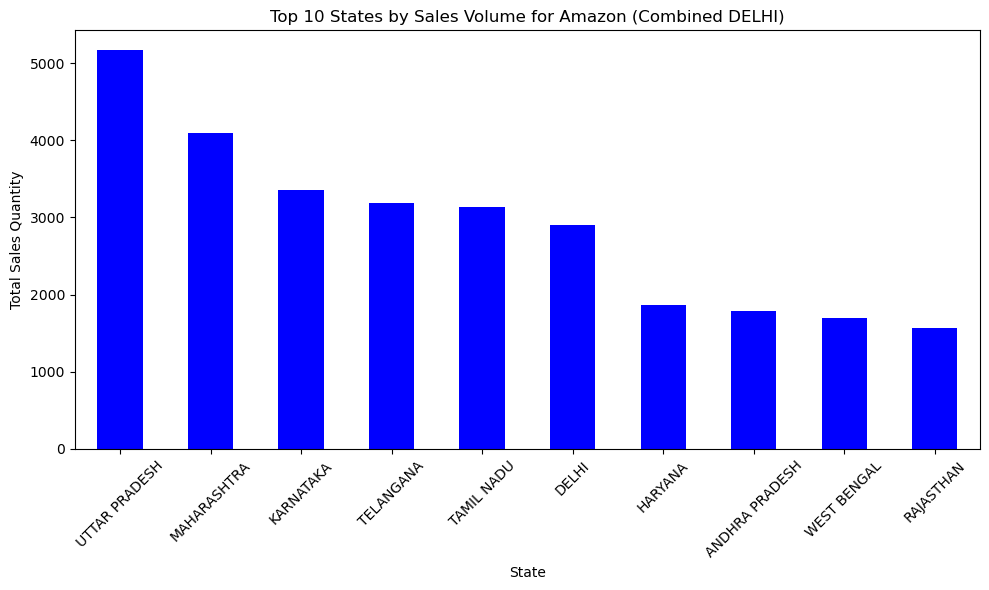

In [97]:
# Group by 'ship_state' and sum the 'quantity' for total sales volume (after combining DELHI)
state_volume = df.groupby('ship_state')['quantity'].sum().nlargest(10)  # Top 10 states by volume

# Plot State vs Volume
plt.figure(figsize=(10, 6))
state_volume.plot(kind='bar', color='blue')
plt.title('Top 10 States by Sales Volume for Amazon (Combined DELHI)')
plt.xlabel('State')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
# Total orders by state
total_orders = df.groupby('ship_state').size()

# Cancelled orders by state (assuming 'order_status' contains 'Cancelled')
cancelled_orders = df[df['order_status'] == 'Cancelled'].groupby('ship_state').size()

# Returned orders by state (assuming 'order_status' contains 'Returned')
returned_orders = df[df['order_status'] == 'Returned'].groupby('ship_state').size()

# Calculate cancellation percentage and return percentage
cancellation_percentage = (cancelled_orders / total_orders * 100).fillna(0)
return_percentage = (returned_orders / total_orders * 100).fillna(0)

# Get top 10 states by cancellation percentage
top_10_cancellation = cancellation_percentage.nlargest(10)

# Get top 10 states by return percentage
top_10_return = return_percentage.nlargest(10)

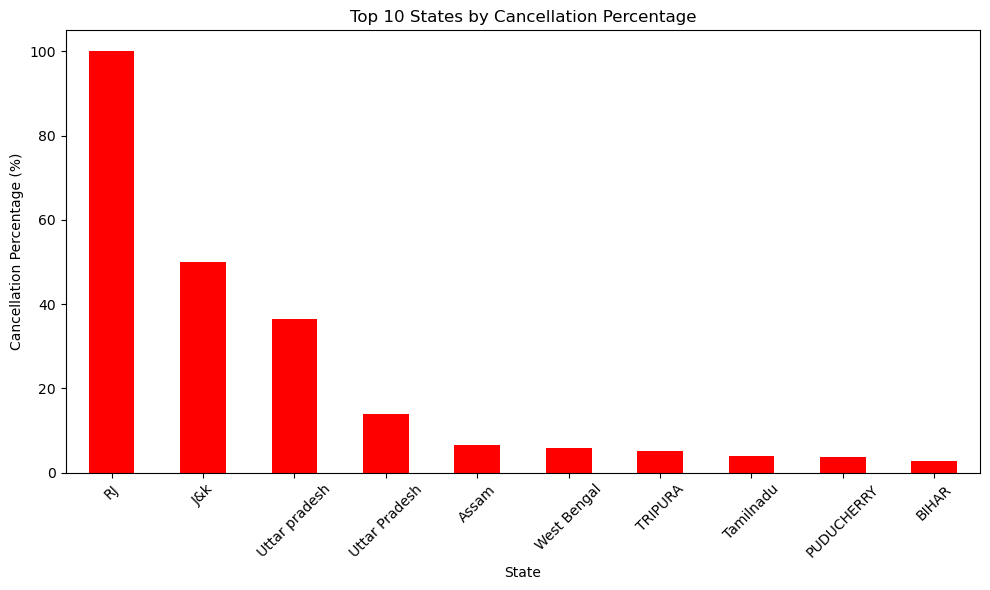

In [105]:
# Plot top 10 states by cancellation percentage
plt.figure(figsize=(10, 6))
top_10_cancellation.plot(kind='bar', color='red')
plt.title('Top 10 States by Cancellation Percentage')
plt.xlabel('State')
plt.ylabel('Cancellation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


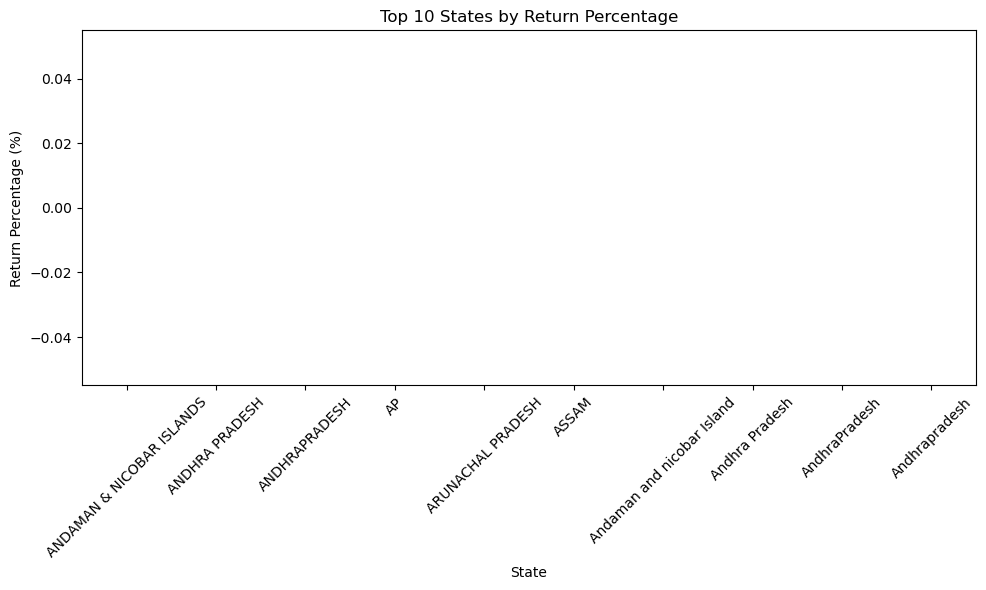

In [107]:
# Plot top 10 states by return percentage
plt.figure(figsize=(10, 6))
top_10_return.plot(kind='bar', color='blue')
plt.title('Top 10 States by Return Percentage')
plt.xlabel('State')
plt.ylabel('Return Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [109]:
print(df.columns)


Index(['purchase_date', 'last_updated_date', 'order_status',
       'fulfillment_channel', 'ship_service_level', 'product_name', 'sku',
       'asin', 'item_status', 'quantity', 'item_price', 'item_tax',
       'shipping_price', 'shipping_tax', 'gift_wrap_price',
       'item_promotion_discount', 'ship_promotion_discount', 'ship_city',
       'SHIP_STATE', 'ship_state', 'ship_postal_code', 'is_business_order',
       'is_replacement_order', 'is_exchange_order', 'account_id',
       'create_time', 'update_time'],
      dtype='object')


In [111]:
# Extract the year from 'purchase_date'
df['year'] = df['purchase_date'].dt.year

# Calculate total orders by year
total_orders_by_year = df.groupby('year').size()

# Calculate cancelled orders by year (assuming 'order_status' contains 'Cancelled')
cancelled_orders_by_year = df[df['order_status'] == 'Cancelled'].groupby('year').size()

# Calculate cancellation rate (percentage)
cancellation_rate_by_year = (cancelled_orders_by_year / total_orders_by_year * 100).fillna(0)


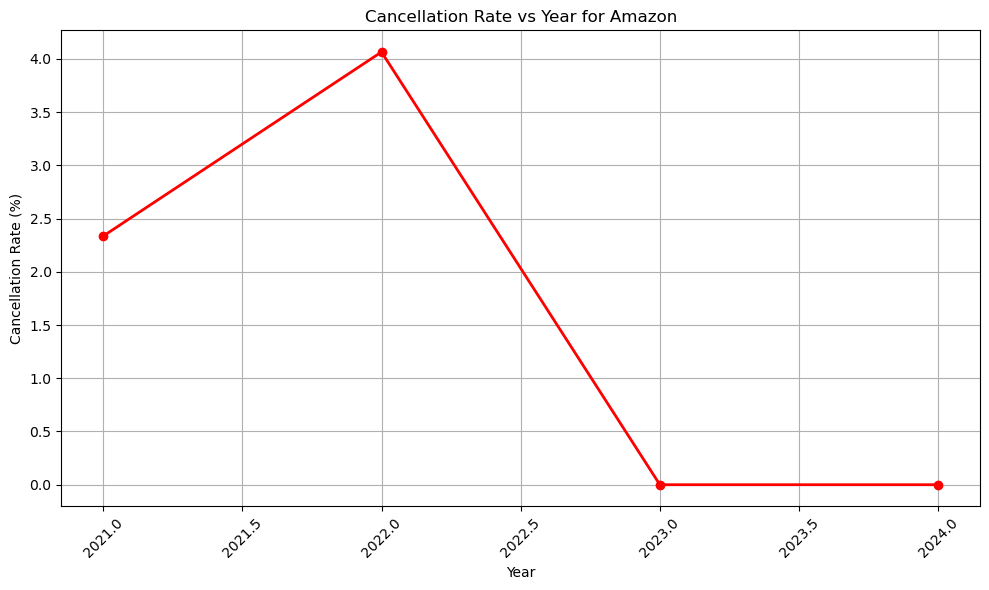

In [113]:
# Plot Cancellation Rate vs Year
plt.figure(figsize=(10, 6))
cancellation_rate_by_year.plot(kind='line', color='red', marker='o', linewidth=2)
plt.title('Cancellation Rate vs Year for Amazon')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


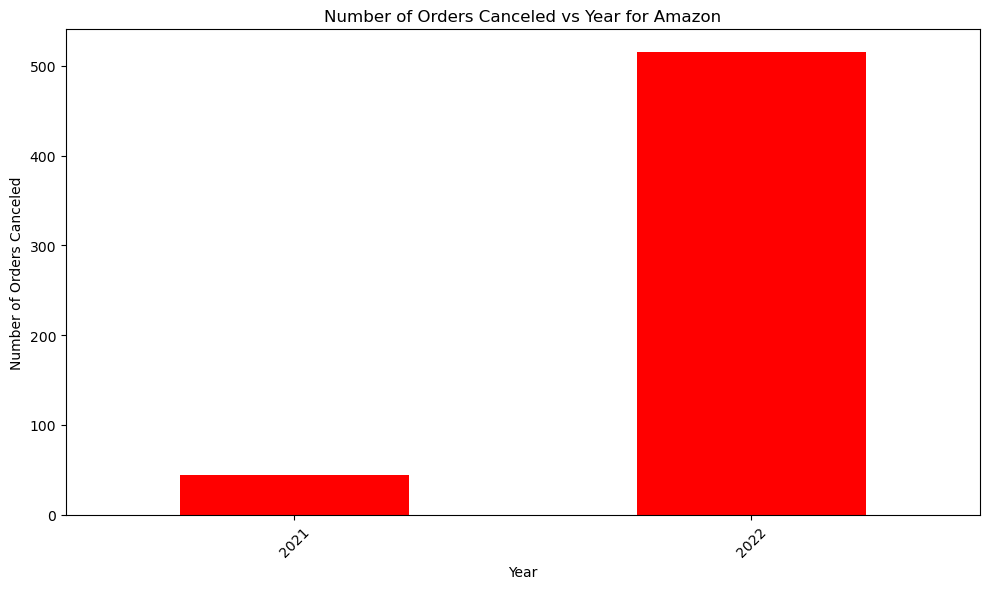

In [115]:
# Extract the year from 'last_updated_date'
df['year'] = df['purchase_date'].dt.year

# Calculate the number of cancelled orders by year (assuming 'order_status' contains 'Cancelled')
cancelled_orders_by_year = df[df['order_status'] == 'Cancelled'].groupby('year').size()

# Plot Number of Orders Canceled vs Year
plt.figure(figsize=(10, 6))
cancelled_orders_by_year.plot(kind='bar', color='red')
plt.title('Number of Orders Canceled vs Year for Amazon')
plt.xlabel('Year')
plt.ylabel('Number of Orders Canceled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
df.order_status.value_counts()

order_status
Shipped                          20807
Shipped - Delivered to Buyer     15312
Shipped - Returned to Seller      1661
Cancelled                          559
Shipped - Picked Up                132
Shipped - Returning to Seller       41
Shipped - Out for Delivery          37
Pending                             28
Shipped - Rejected by Buyer          8
Shipped - Lost in Transit            2
Shipped - Undeliverable              1
Pending - Waiting for Pick Up        1
Name: count, dtype: int64

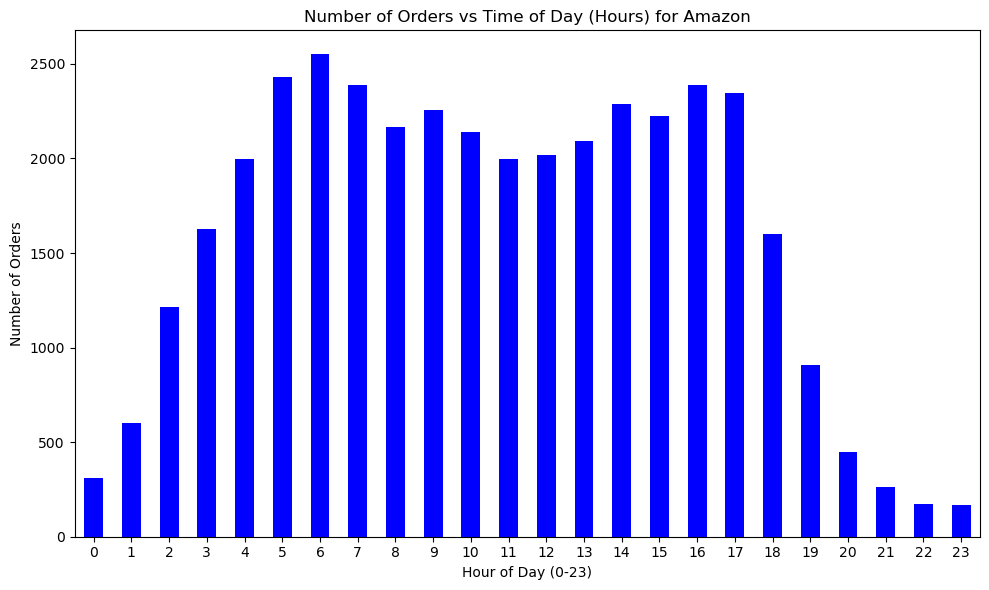

In [135]:
# Extract the hour from 'last_updated_date'
df['hour'] = df['purchase_date'].dt.hour

# Calculate the number of orders by hour
orders_by_hour = df.groupby('hour').size()

# Plot Number of Orders vs Time (Hours)
plt.figure(figsize=(10, 6))
orders_by_hour.plot(kind='bar', color='blue')
plt.title('Number of Orders vs Time of Day (Hours) for Amazon')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

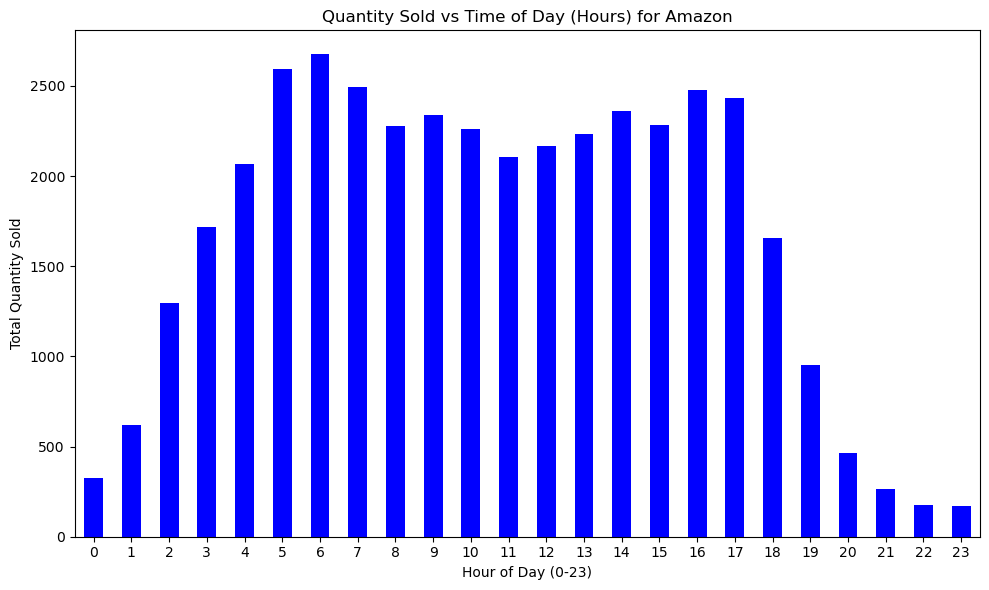

In [129]:
# Extract the hour from 'last_updated_date'
df['hour'] = df['last_updated_date'].dt.hour

# 1. Calculate total quantity sold by hour
quantity_by_hour = df.groupby('hour')['quantity'].sum()

# 2. Calculate total revenue by hour
df['revenue'] = df['quantity'] * (df['item_price'] + df['shipping_price'])  # Calculate revenue
revenue_by_hour = df.groupby('hour')['revenue'].sum()

# Plot 1: Quantity Sold vs Hour
plt.figure(figsize=(10, 6))
quantity_by_hour.plot(kind='bar', color='blue')
plt.title('Quantity Sold vs Time of Day (Hours) for Amazon')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

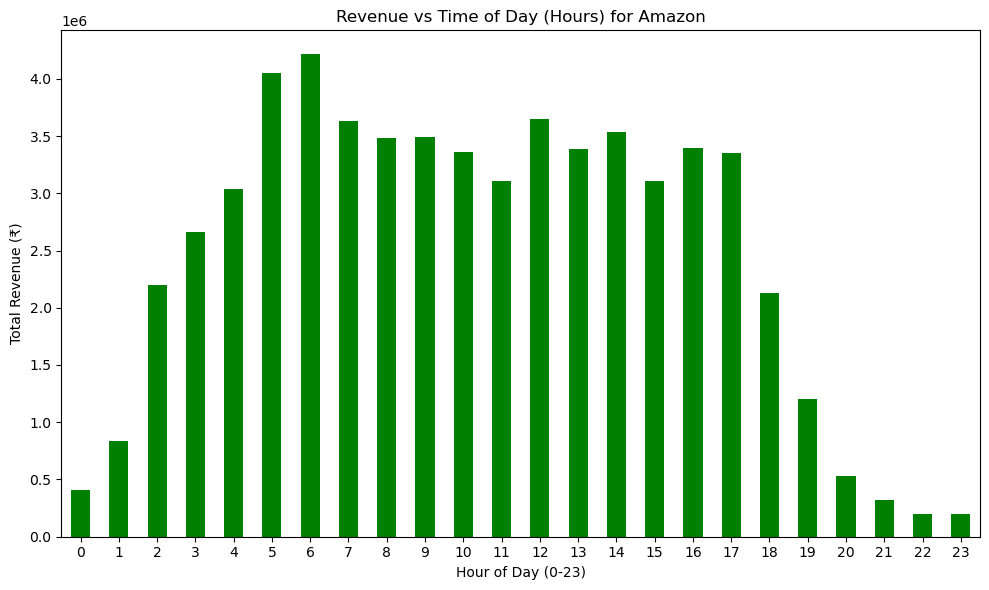

In [131]:
plt.figure(figsize=(10, 6))
revenue_by_hour.plot(kind='bar', color='green')
plt.title('Revenue vs Time of Day (Hours) for Amazon')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize logistics partners
def categorize_partner(partner_name):
    cod_partners = [
        'Delhivery E2E Prepaid',
        'Delhivery Volumetric Lastmile COD',
        'Delhivery Volumetric Lastmile Prepaid',
        'Delivery EZE COD',
        'delhivery-cod',
        'ecom-cod',
        'flipkartlogistics-cod'
    ]
    
    if partner_name in cod_partners:
        return 'COD'
    else:
        return 'Non-COD'

# Apply the categorization to create a new column
df2['partner_type'] = df2['pickup_logistics_partner'].apply(categorize_partner)

# Calculate return percentage by partner type
return_percentage_by_partner = (
    df2[df2['order_item_status'] == 'RETURNED']
    .groupby('partner_type')['order_item_status']
    .count() / df2.groupby('partner_type')['order_item_status']
    .count() * 100
).reset_index(name='return_percentage')

# Plotting the return percentage by partner type
plt.figure(figsize=(8, 6))
plt.bar(return_percentage_by_partner['partner_type'], return_percentage_by_partner['return_percentage'], color=['blue', 'orange'])
plt.xlabel('Logistics Partner Type')
plt.ylabel('Return Percentage')
plt.title('Return Percentage by Logistics Partner Type (COD vs Non-COD)')
plt.ylim(0, return_percentage_by_partner['return_percentage'].max() + 5)
plt.show()

# Identify the partner type with the highest return percentage
best_partner_type = return_percentage_by_partner.sort_values(by='return_percentage', ascending=False).head(1)
print("Logistics Partner Type with Highest Return Percentage:")
print(best_partner_type)


NameError: name 'df2' is not defined